<a href="https://colab.research.google.com/github/darelover/Image-Recognition-cifar10/blob/master/Image_Recognition_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = cifar10.load_data()

print X_train_orig.shape
print X_test_orig.shape

print Y_train_orig.shape
print Y_test_orig.shape

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


[4]


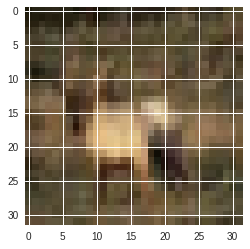

In [4]:
imgplot = plt.imshow(X_train_orig[3])
print Y_train_orig[3]

[0]


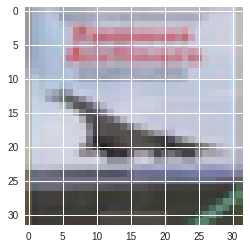

In [5]:
imgplot = plt.imshow(X_test_orig[3])
print Y_test_orig[3] 

In [0]:
input_shape = (32,32,3)
num_classes = 10

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)  

In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [9]:
X_train = X_train_orig.astype('float32')
X_test = X_test_orig.astype('float32')

X_train /= 255
X_test /= 255

Y_train = convert_to_one_hot(Y_train_orig, num_classes).T
Y_test = convert_to_one_hot(Y_test_orig, num_classes).T

print X_train.shape
print X_test.shape

print Y_train.shape
print Y_test.shape

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [0]:
opt_rms = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
model.compile(optimizer=opt_rms, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist = model.fit(X_train, Y_train, epochs=50, batch_size=256, validation_data=(X_test,Y_test), shuffle=True) 

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.8784 - acc: 0.4360 - val_loss: 1.6672 - val_acc: 0.4513
Epoch 2/50
50000/50000 [==============================] - 16s 327us/step - loss: 1.1294 - acc: 0.6198 - val_loss: 1.2511 - val_acc: 0.5837
Epoch 3/50
50000/50000 [==============================] - 16s 327us/step - loss: 0.9224 - acc: 0.6940 - val_loss: 0.9104 - val_acc: 0.6931
Epoch 4/50
50000/50000 [==============================] - 16s 325us/step - loss: 0.8087 - acc: 0.7308 - val_loss: 0.9231 - val_acc: 0.6968
Epoch 5/50
50000/50000 [==============================] - 16s 325us/step - loss: 0.7275 - acc: 0.7605 - val_loss: 1.9143 - val_acc: 0.3990
Epoch 6/50
50000/50000 [==============================] - 16s 322us/step - loss: 0.7031 - acc: 0.7747 - val_loss: 0.8938 - val_acc: 0.7176
Epoch 7/50
50000/50000 [==============================] - 16s 320us/

In [0]:
# model.save_weights("weights_colab.h5")
# model.save("model_colab.h5")

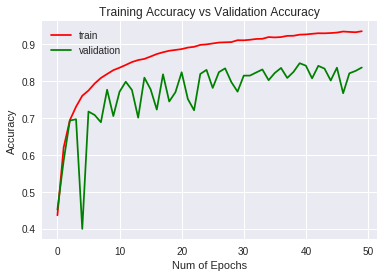

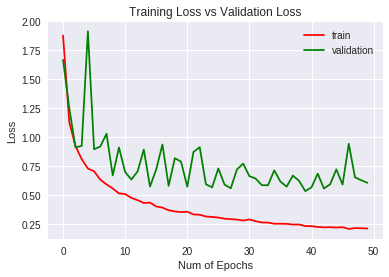

In [14]:
plt.figure(0)
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'g')
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'g')
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()